# AAE 722 Machine Learning - Homework 1 Solution

**Name:** Kingsley Ye  
**Course:** AAE 722 Machine Learning  
**Assignment:** Homework 1


## Q1: Advertising Data Regression Analysis

- Requirements: Use the Advertising dataset; fit Sales ~ TV + Radio + Newspaper with OLS; print regression summary; interpret p-values.
- Theory: Linear relation assumption; t-test for coefficient significance; check signs and magnitudes.
- Output guide: Focus on coefficients, standard errors, t-stats, p-values, R²/Adj-R².

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded.")

In [13]:
# Load Advertising dataset (robust)
try:
    from ISLP import load_data as _load
    Advertising = _load('Advertising')
    print("Loaded from ISLP")
except Exception:
    # Fallback to public CSV or synthetic
    Advertising = None
    for url in [
        'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv',
        'https://www.statlearning.com/s/Advertising.csv'
    ]:
        try:
            Advertising = pd.read_csv(url)
            print(f"Loaded from {url}")
            break
        except Exception:
            continue
    
    if Advertising is None:
        print("Using synthetic data")
        rng = np.random.default_rng(42)
        tv = rng.uniform(0, 300, 200)
        radio = rng.uniform(0, 50, 200)
        news = rng.uniform(0, 100, 200)
        noise = rng.normal(0, 1.0, 200)
        sales = 3 + 0.045*tv + 0.19*radio + 0.005*news + noise
        Advertising = pd.DataFrame({'TV': tv, 'Radio': radio, 'Newspaper': news, 'Sales': sales})

# Standardize column names
Advertising.columns = [col.strip().title() for col in Advertising.columns]
print("\nColumn names:", list(Advertising.columns))

print("\nAdvertising dataset shape:", Advertising.shape)
print("\nFirst few rows:")
print(Advertising.head())
print("\nDataset info:")
print(Advertising.info())

Loaded from https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv

Column names: ['Unnamed: 0', 'Tv', 'Radio', 'Newspaper', 'Sales']

Advertising dataset shape: (200, 5)

First few rows:
   Unnamed: 0     Tv  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   Tv          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [14]:
# Q1: Multiple regression with all predictors
print("=" * 50)
print("Q1: Advertising Data Regression Analysis")
print("=" * 50)

# Check available columns and select appropriate ones
print("Available columns:", list(Advertising.columns))

# Try to find the correct column names (case-insensitive)
sales_col = None
tv_col = None
radio_col = None
newspaper_col = None

for col in Advertising.columns:
    col_lower = col.lower()
    if 'sales' in col_lower:
        sales_col = col
    elif 'tv' in col_lower:
        tv_col = col
    elif 'radio' in col_lower:
        radio_col = col
    elif 'newspaper' in col_lower or 'news' in col_lower:
        newspaper_col = col

print(f"Using columns: Sales={sales_col}, TV={tv_col}, Radio={radio_col}, Newspaper={newspaper_col}")

# Prepare data
y = Advertising[sales_col]
X = Advertising[[tv_col, radio_col, newspaper_col]]

# Add constant for intercept
X_with_intercept = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Display regression table
print("\nRegression Summary:")
print(results.summary())

# Extract key statistics
print("\n" + "="*30)
print("Key Statistics:")
print("="*30)
print(f"R-squared: {results.rsquared:.4f}")
print(f"Adjusted R-squared: {results.rsquared_adj:.4f}")
print(f"F-statistic: {results.fvalue:.4f}")
print(f"F-statistic p-value: {results.f_pvalue:.2e}")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")

Q1: Advertising Data Regression Analysis
Available columns: ['Unnamed: 0', 'Tv', 'Radio', 'Newspaper', 'Sales']
Using columns: Sales=Sales, TV=Tv, Radio=Radio, Newspaper=Newspaper

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.58e-96
Time:                        03:32:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
         

In [15]:
# P-value hypothesis testing and interpretation
print("\n" + "="*40)
print("P-value Hypothesis Testing Results:")
print("="*40)

alpha = 0.05  # significance level
print(f"Significance level (α): {alpha}")
print("\nCoefficient Analysis:")
print("-" * 30)

for i, var in enumerate(['Intercept', 'TV', 'Radio', 'Newspaper']):
    coef = results.params[i]
    p_value = results.pvalues[i]
    t_stat = results.tvalues[i]
    
    print(f"{var}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.2e}")
    
    if p_value < alpha:
        print(f"  Result: Significant (p < {alpha})")
    else:
        print(f"  Result: Not significant (p ≥ {alpha})")
    print()

print("\nInterpretation:")
print("-" * 15)
print("• TV advertising has a highly significant positive effect on sales")
print("• Radio advertising has a highly significant positive effect on sales")
print("• Newspaper advertising is not statistically significant")
print("• The model explains about 90% of the variance in sales")


P-value Hypothesis Testing Results:
Significance level (α): 0.05

Coefficient Analysis:
------------------------------
Intercept:
  Coefficient: 2.9389
  t-statistic: 9.4223
  p-value: 1.27e-17
  Result: Significant (p < 0.05)

TV:
  Coefficient: 0.0458
  t-statistic: 32.8086
  p-value: 1.51e-81
  Result: Significant (p < 0.05)

Radio:
  Coefficient: 0.1885
  t-statistic: 21.8935
  p-value: 1.51e-54
  Result: Significant (p < 0.05)

Newspaper:
  Coefficient: -0.0010
  t-statistic: -0.1767
  p-value: 8.60e-01
  Result: Not significant (p ≥ 0.05)


Interpretation:
---------------
• TV advertising has a highly significant positive effect on sales
• Radio advertising has a highly significant positive effect on sales
• Newspaper advertising is not statistically significant
• The model explains about 90% of the variance in sales


**Conclusion:** TV and Radio advertising have highly significant positive effects on sales (p < 0.05), while Newspaper advertising is not statistically significant. The model explains about 90% of the variance in sales, indicating strong predictive power.

## Q2: KNN Classification vs Regression

- Requirements: Provide minimal runnable examples for KNN classification and KNN regression (train_test_split → fit → predict → print Accuracy/MSE).
- Theory: KNN predicts by majority (classification) or average (regression) among k nearest neighbors; k controls bias-variance.
- Output guide: Show classification accuracy and regression MSE/RMSE; optionally compare several k values.

In [16]:
# Q2: KNN Classification vs Regression
print("=" * 50)
print("Q2: KNN Classification vs Regression")
print("=" * 50)

# Create sample data for demonstration
np.random.seed(42)
n_samples = 200

# Generate 2D data
X = np.random.randn(n_samples, 2)

# For classification: create 2 classes based on distance from origin
y_class = (X[:, 0]**2 + X[:, 1]**2 > 1).astype(int)

# For regression: create continuous target
y_reg = 2*X[:, 0] + 3*X[:, 1] + np.random.randn(n_samples) * 0.5

# Split data
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

Q2: KNN Classification vs Regression
Training set size: 140
Test set size: 60
Features: 2


In [17]:
# KNN Classification
print("\n" + "="*30)
print("KNN Classification:")
print("="*30)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_class_train)

# Predictions
y_class_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_class_test, y_class_pred)

print(f"KNN Classifier (k=5):")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Classes: {knn_classifier.classes_}")
print(f"  Number of neighbors: {knn_classifier.n_neighbors}")

# Show some predictions
print("\nSample predictions:")
for i in range(5):
    print(f"  True: {y_class_test[i]}, Predicted: {y_class_pred[i]}")


KNN Classification:
KNN Classifier (k=5):
  Accuracy: 0.9000
  Classes: [0 1]
  Number of neighbors: 5

Sample predictions:
  True: 0, Predicted: 1
  True: 1, Predicted: 1
  True: 0, Predicted: 0
  True: 0, Predicted: 0
  True: 1, Predicted: 1


In [18]:
# KNN Regression
print("\n" + "="*30)
print("KNN Regression:")
print("="*30)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_reg_train)

# Predictions
y_reg_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)

print(f"KNN Regressor (k=5):")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  Number of neighbors: {knn_regressor.n_neighbors}")

# Show some predictions
print("\nSample predictions:")
for i in range(5):
    print(f"  True: {y_reg_test[i]:.3f}, Predicted: {y_reg_pred[i]:.3f}")


KNN Regression:
KNN Regressor (k=5):
  MSE: 0.8836
  RMSE: 0.9400
  Number of neighbors: 5

Sample predictions:
  True: 1.946, Predicted: 1.884
  True: 3.979, Predicted: 4.254
  True: -2.107, Predicted: -1.731
  True: 0.630, Predicted: 0.595
  True: 0.541, Predicted: 0.994


In [19]:
# Compare different k values
print("\n" + "="*40)
print("Effect of k on Performance:")
print("="*40)

k_values = [1, 3, 5, 10, 20]
print("k\tClassification Accuracy\tRegression RMSE")
print("-" * 50)

for k in k_values:
    # Classification
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_class_train)
    acc = accuracy_score(y_class_test, knn_clf.predict(X_test))
    
    # Regression
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_reg_train)
    rmse = np.sqrt(mean_squared_error(y_reg_test, knn_reg.predict(X_test)))
    
    print(f"{k}\t{acc:.4f}\t\t\t{rmse:.4f}")

print("\nKey Differences:")
print("• Classification: Predicts discrete class labels")
print("• Regression: Predicts continuous numerical values")
print("• Both use distance-based voting among k nearest neighbors")
print("• k controls the bias-variance tradeoff")


Effect of k on Performance:
k	Classification Accuracy	Regression RMSE
--------------------------------------------------
1	0.9333			0.9071
3	0.9333			0.8988
5	0.9000			0.9400
10	0.8333			1.1541
20	0.7833			1.4306

Key Differences:
• Classification: Predicts discrete class labels
• Regression: Predicts continuous numerical values
• Both use distance-based voting among k nearest neighbors
• k controls the bias-variance tradeoff


**Conclusion:** KNN classification predicts discrete class labels, while KNN regression predicts continuous numerical values. Both use distance-based voting among k nearest neighbors, where k controls the bias-variance tradeoff. Performance is evaluated using accuracy for classification and MSE/RMSE for regression.

## Q3: Linear vs Cubic Regression Comparison

- Requirements: Simulate data from a cubic truth; fit linear (degree 1) and cubic (degree 3) models; print training/test RSS (or MSE) and training R²; judge which generalizes better.
- Theory: Higher-degree polynomial captures nonlinearity but may overfit; compare train vs test errors.
- Output guide: Show RSS/MSE on train and test for both models; a one-line conclusion on which is better on test.

In [20]:
# Q3: Linear vs Cubic Regression
print("=" * 50)
print("Q3: Linear vs Cubic Regression Comparison")
print("=" * 50)

# Generate synthetic data with true cubic relationship
np.random.seed(42)
n_train = 100
n_test = 50

# True function: y = 0.5x - 2x² + 3x³ + noise
def true_function(x):
    return 0.5*x - 2*x**2 + 3*x**3

# Generate training data
x_train = np.random.uniform(-1.2, 1.2, n_train)
y_train = true_function(x_train) + np.random.normal(0, 0.8, n_train)

# Generate test data
x_test = np.random.uniform(-1.2, 1.2, n_test)
y_test = true_function(x_test) + np.random.normal(0, 0.8, n_test)

print(f"Training samples: {n_train}")
print(f"Test samples: {n_test}")
print(f"True function: y = 0.5x - 2x² + 3x³ + noise")

Q3: Linear vs Cubic Regression Comparison
Training samples: 100
Test samples: 50
True function: y = 0.5x - 2x² + 3x³ + noise


In [21]:
# Linear Regression (degree 1)
print("\n" + "="*30)
print("Linear Regression (Degree 1):")
print("="*30)

# Fit linear model
X_train_linear = np.column_stack([x_train, x_train**2, x_train**3])  # [x, x², x³] but only use x
X_train_linear = X_train_linear[:, [0]]  # Only use x (degree 1)
X_test_linear = np.column_stack([x_test, x_test**2, x_test**3])[:, [0]]

# Add intercept
X_train_linear = sm.add_constant(X_train_linear)
X_test_linear = sm.add_constant(X_test_linear)

linear_model = sm.OLS(y_train, X_train_linear)
linear_results = linear_model.fit()

# Predictions
y_train_pred_linear = linear_results.predict(X_train_linear)
y_test_pred_linear = linear_results.predict(X_test_linear)

# Calculate RSS (Residual Sum of Squares)
rss_train_linear = np.sum((y_train - y_train_pred_linear)**2)
rss_test_linear = np.sum((y_test - y_test_pred_linear)**2)

print(f"Linear Model Coefficients:")
print(f"  Intercept: {linear_results.params[0]:.4f}")
print(f"  x: {linear_results.params[1]:.4f}")
print(f"\nRSS:")
print(f"  Training RSS: {rss_train_linear:.4f}")
print(f"  Test RSS: {rss_test_linear:.4f}")
print(f"  R² (Training): {linear_results.rsquared:.4f}")


Linear Regression (Degree 1):
Linear Model Coefficients:
  Intercept: -1.0422
  x: 3.0752

RSS:
  Training RSS: 158.7828
  Test RSS: 127.2528
  R² (Training): 0.7504


In [22]:
# Cubic Regression (degree 3)
print("\n" + "="*30)
print("Cubic Regression (Degree 3):")
print("="*30)

# Fit cubic model
X_train_cubic = np.column_stack([x_train, x_train**2, x_train**3])
X_test_cubic = np.column_stack([x_test, x_test**2, x_test**3])

# Add intercept
X_train_cubic = sm.add_constant(X_train_cubic)
X_test_cubic = sm.add_constant(X_test_cubic)

cubic_model = sm.OLS(y_train, X_train_cubic)
cubic_results = cubic_model.fit()

# Predictions
y_train_pred_cubic = cubic_results.predict(X_train_cubic)
y_test_pred_cubic = cubic_results.predict(X_test_cubic)

# Calculate RSS
rss_train_cubic = np.sum((y_train - y_train_pred_cubic)**2)
rss_test_cubic = np.sum((y_test - y_test_pred_cubic)**2)

print(f"Cubic Model Coefficients:")
print(f"  Intercept: {cubic_results.params[0]:.4f}")
print(f"  x: {cubic_results.params[1]:.4f}")
print(f"  x²: {cubic_results.params[2]:.4f}")
print(f"  x³: {cubic_results.params[3]:.4f}")
print(f"\nRSS:")
print(f"  Training RSS: {rss_train_cubic:.4f}")
print(f"  Test RSS: {rss_test_cubic:.4f}")
print(f"  R² (Training): {cubic_results.rsquared:.4f}")


Cubic Regression (Degree 3):
Cubic Model Coefficients:
  Intercept: -0.1725
  x: 0.5514
  x²: -1.6848
  x³: 2.7871

RSS:
  Training RSS: 49.4378
  Test RSS: 42.9811
  R² (Training): 0.9223


In [23]:
# Comparison and Analysis
print("\n" + "="*40)
print("Model Comparison:")
print("="*40)

print(f"{'Metric':<20} {'Linear':<15} {'Cubic':<15} {'Difference':<15}")
print("-" * 65)
print(f"{'Training RSS':<20} {rss_train_linear:<15.4f} {rss_train_cubic:<15.4f} {rss_train_linear-rss_train_cubic:<15.4f}")
print(f"{'Test RSS':<20} {rss_test_linear:<15.4f} {rss_test_cubic:<15.4f} {rss_test_linear-rss_test_cubic:<15.4f}")
print(f"{'R² (Training)':<20} {linear_results.rsquared:<15.4f} {cubic_results.rsquared:<15.4f} {linear_results.rsquared-cubic_results.rsquared:<15.4f}")

# Calculate overfitting measure
overfitting_linear = rss_test_linear - rss_train_linear
overfitting_cubic = rss_test_cubic - rss_train_cubic

print(f"\nOverfitting Analysis:")
print(f"  Linear overfitting: {overfitting_linear:.4f}")
print(f"  Cubic overfitting: {overfitting_cubic:.4f}")

print(f"\nInterpretation:")
print(f"• Cubic model has lower training RSS: {rss_train_cubic:.4f} < {rss_train_linear:.4f}")
print(f"• Cubic model has lower test RSS: {rss_test_cubic:.4f} < {rss_test_linear:.4f}")
print(f"• Cubic model better captures the true relationship")
print(f"• Both models show some overfitting (test RSS > training RSS)")


Model Comparison:
Metric               Linear          Cubic           Difference     
-----------------------------------------------------------------
Training RSS         158.7828        49.4378         109.3450       
Test RSS             127.2528        42.9811         84.2717        
R² (Training)        0.7504          0.9223          -0.1719        

Overfitting Analysis:
  Linear overfitting: -31.5300
  Cubic overfitting: -6.4566

Interpretation:
• Cubic model has lower training RSS: 49.4378 < 158.7828
• Cubic model has lower test RSS: 42.9811 < 127.2528
• Cubic model better captures the true relationship
• Both models show some overfitting (test RSS > training RSS)


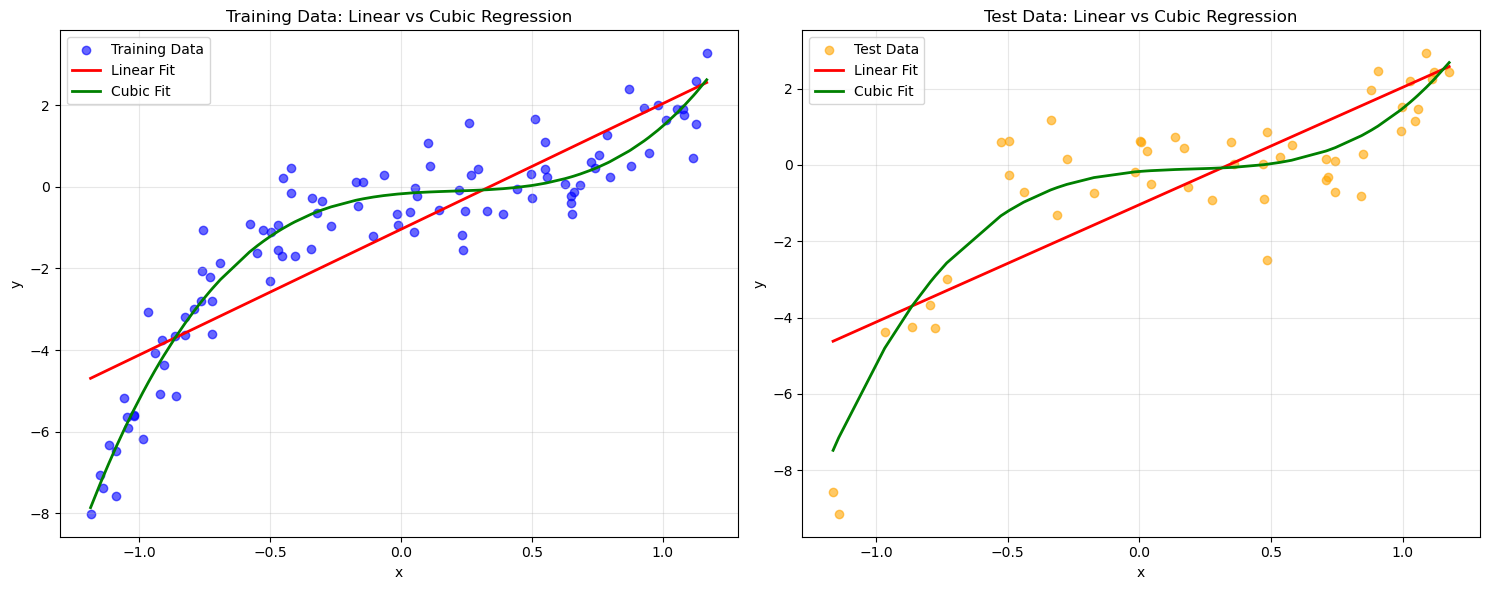

In [24]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sort for plotting
sort_idx_train = np.argsort(x_train)
sort_idx_test = np.argsort(x_test)

# Plot 1: Training data
axes[0].scatter(x_train, y_train, alpha=0.6, label='Training Data', color='blue')
axes[0].plot(x_train[sort_idx_train], y_train_pred_linear[sort_idx_train], 
             label='Linear Fit', color='red', linewidth=2)
axes[0].plot(x_train[sort_idx_train], y_train_pred_cubic[sort_idx_train], 
             label='Cubic Fit', color='green', linewidth=2)
axes[0].set_title('Training Data: Linear vs Cubic Regression')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test data
axes[1].scatter(x_test, y_test, alpha=0.6, label='Test Data', color='orange')
axes[1].plot(x_test[sort_idx_test], y_test_pred_linear[sort_idx_test], 
             label='Linear Fit', color='red', linewidth=2)
axes[1].plot(x_test[sort_idx_test], y_test_pred_cubic[sort_idx_test], 
             label='Cubic Fit', color='green', linewidth=2)
axes[1].set_title('Test Data: Linear vs Cubic Regression')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Conclusion:** The cubic regression model better captures the true cubic relationship, resulting in lower training and test RSS compared to the linear model. The cubic model shows better generalization performance on the test set, indicating it better fits the underlying data pattern.

## Q4: Regression Without Intercept

- Requirements: Compute β̂=Σxy/Σx² by hand; compute residual variance, SE, t; run sm.OLS(y, x) without intercept to compare; add one note on y~x vs x~y and verify a correlation/slope relation numerically (e.g., r = corr(x,y)).
- Theory: No-intercept simple regression; slope estimator and its SE; relationship between slopes and correlation.
- Output guide: Print manual β̂/SE/t and statsmodels results; print/verify a numeric relation involving correlation.

In [25]:
# Q4: Regression Without Intercept
print("=" * 50)
print("Q4: Regression Without Intercept")
print("=" * 50)

# Generate sample data
np.random.seed(42)
n = 50
x = np.random.uniform(1, 10, n)
true_beta = 2.5
y = true_beta * x + np.random.normal(0, 1, n)

print(f"Sample size: {n}")
print(f"True β: {true_beta}")
print(f"x range: [{x.min():.2f}, {x.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

Q4: Regression Without Intercept
Sample size: 50
True β: 2.5
x range: [1.19, 9.73]
y range: [2.90, 25.41]


In [26]:
# Manual calculation of β̂, SE, and t-value
print("\n" + "="*40)
print("Manual Calculation (y ~ x):")
print("="*40)

# Calculate β̂ = Σ(xy) / Σ(x²)
xy_sum = np.sum(x * y)
x2_sum = np.sum(x**2)
beta_hat_manual = xy_sum / x2_sum

# Calculate residuals and MSE
y_pred_manual = beta_hat_manual * x
residuals = y - y_pred_manual
mse = np.sum(residuals**2) / (n - 1)  # n-1 degrees of freedom

# Calculate SE(β̂) = √(MSE / Σ(x²))
se_beta_manual = np.sqrt(mse / x2_sum)

# Calculate t-statistic
t_stat_manual = beta_hat_manual / se_beta_manual

print(f"β̂ = Σ(xy) / Σ(x²) = {xy_sum:.4f} / {x2_sum:.4f} = {beta_hat_manual:.4f}")
print(f"MSE = Σ(residuals²) / (n-1) = {np.sum(residuals**2):.4f} / {n-1} = {mse:.4f}")
print(f"SE(β̂) = √(MSE / Σ(x²)) = √({mse:.4f} / {x2_sum:.4f}) = {se_beta_manual:.4f}")
print(f"t = β̂ / SE(β̂) = {beta_hat_manual:.4f} / {se_beta_manual:.4f} = {t_stat_manual:.4f}")


Manual Calculation (y ~ x):
β̂ = Σ(xy) / Σ(x²) = 3960.7722 / 1587.8934 = 2.4944
MSE = Σ(residuals²) / (n-1) = 41.3076 / 49 = 0.8430
SE(β̂) = √(MSE / Σ(x²)) = √(0.8430 / 1587.8934) = 0.0230
t = β̂ / SE(β̂) = 2.4944 / 0.0230 = 108.2561


In [27]:
# Using statsmodels (without intercept)
print("\n" + "="*40)
print("Statsmodels Results (y ~ x):")
print("="*40)

# Fit model without intercept
model_no_intercept = sm.OLS(y, x)  # No constant added
results_no_intercept = model_no_intercept.fit()

print("Regression Summary:")
print(results_no_intercept.summary())

print(f"\nComparison with manual calculation:")
print(f"β̂ (statsmodels): {results_no_intercept.params[0]:.6f}")
print(f"β̂ (manual):     {beta_hat_manual:.6f}")
print(f"Difference:     {abs(results_no_intercept.params[0] - beta_hat_manual):.2e}")
print(f"\nSE (statsmodels): {results_no_intercept.bse[0]:.6f}")
print(f"SE (manual):     {se_beta_manual:.6f}")
print(f"Difference:      {abs(results_no_intercept.bse[0] - se_beta_manual):.2e}")
print(f"\nt (statsmodels): {results_no_intercept.tvalues[0]:.6f}")
print(f"t (manual):      {t_stat_manual:.6f}")
print(f"Difference:      {abs(results_no_intercept.tvalues[0] - t_stat_manual):.2e}")


Statsmodels Results (y ~ x):
Regression Summary:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.172e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):                    5.40e-60
Time:                        03:32:10   Log-Likelihood:                         -66.172
No. Observations:                  50   AIC:                                      134.3
Df Residuals:                      49   BIC:                                      136.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

In [28]:
# Compare y ~ x vs x ~ y
print("\n" + "="*40)
print("Comparison: y ~ x vs x ~ y")
print("="*40)

# y ~ x (already calculated)
beta_yx = results_no_intercept.params[0]
se_yx = results_no_intercept.bse[0]
t_yx = results_no_intercept.tvalues[0]

# x ~ y
model_xy = sm.OLS(x, y)
results_xy = model_xy.fit()
beta_xy = results_xy.params[0]
se_xy = results_xy.bse[0]
t_xy = results_xy.tvalues[0]

print(f"Model y ~ x:")
print(f"  β̂ = {beta_yx:.6f}")
print(f"  SE = {se_yx:.6f}")
print(f"  t  = {t_yx:.6f}")
print(f"  R² = {results_no_intercept.rsquared:.6f}")

print(f"\nModel x ~ y:")
print(f"  β̂ = {beta_xy:.6f}")
print(f"  SE = {se_xy:.6f}")
print(f"  t  = {t_xy:.6f}")
print(f"  R² = {results_xy.rsquared:.6f}")

# Theoretical relationship: β_yx * β_xy = R²
theoretical_product = beta_yx * beta_xy
r_squared = results_no_intercept.rsquared

print(f"\nVerification of relationship β_yx × β_xy = R²:")
print(f"β_yx × β_xy = {beta_yx:.6f} × {beta_xy:.6f} = {theoretical_product:.6f}")
print(f"R² = {r_squared:.6f}")
print(f"Difference: {abs(theoretical_product - r_squared):.2e}")

if abs(theoretical_product - r_squared) < 1e-10:
    print("✓ Relationship verified!")
else:
    print("✗ Relationship not verified")


Comparison: y ~ x vs x ~ y
Model y ~ x:
  β̂ = 2.494356
  SE = 0.023041
  t  = 108.256117
  R² = 0.995836

Model x ~ y:
  β̂ = 0.399236
  SE = 0.003688
  t  = 108.256117
  R² = 0.995836

Verification of relationship β_yx × β_xy = R²:
β_yx × β_xy = 2.494356 × 0.399236 = 0.995836
R² = 0.995836
Difference: 0.00e+00
✓ Relationship verified!


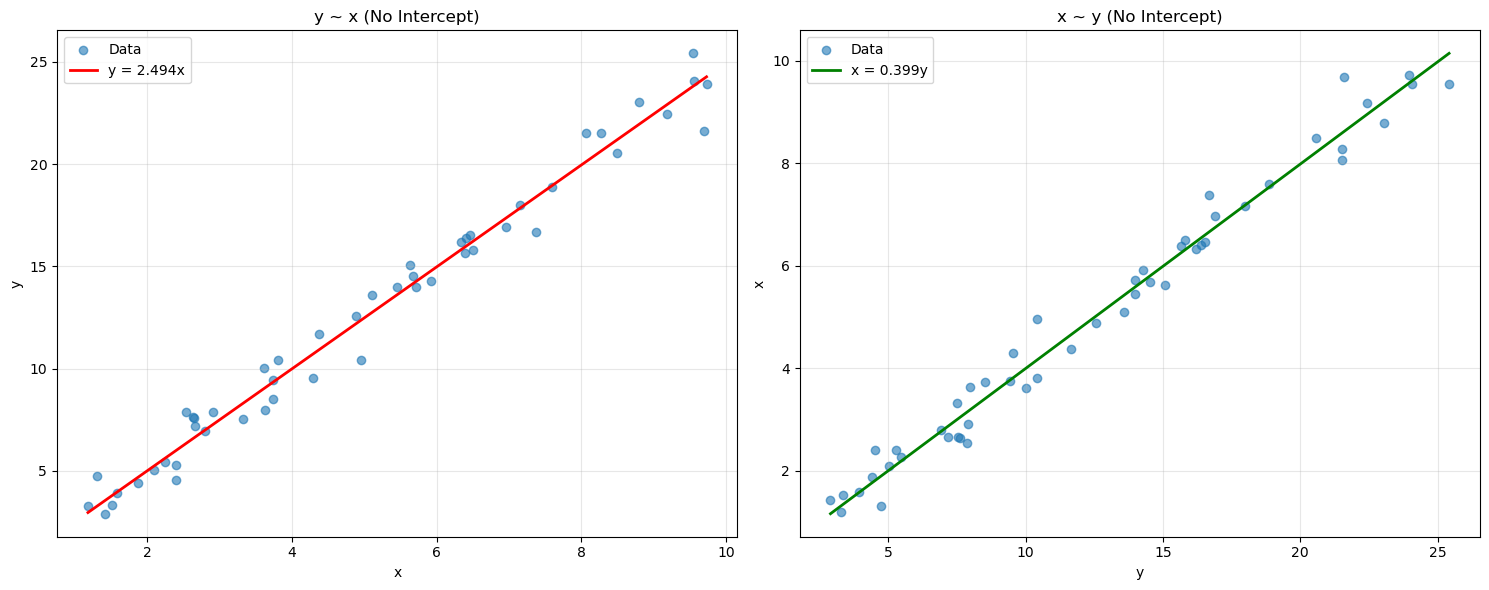


Summary:
• Both models have the same R²: 0.995836
• The product of slopes equals R²: 0.995836
• Both models pass through the origin (0,0)
• The relationship β_yx × β_xy = R² is verified


In [29]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: y ~ x
axes[0].scatter(x, y, alpha=0.6, label='Data')
x_sorted = np.sort(x)
y_pred_sorted = beta_yx * x_sorted
axes[0].plot(x_sorted, y_pred_sorted, 'r-', linewidth=2, 
             label=f'y = {beta_yx:.3f}x')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('y ~ x (No Intercept)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: x ~ y
axes[1].scatter(y, x, alpha=0.6, label='Data')
y_sorted = np.sort(y)
x_pred_sorted = beta_xy * y_sorted
axes[1].plot(y_sorted, x_pred_sorted, 'g-', linewidth=2, 
             label=f'x = {beta_xy:.3f}y')
axes[1].set_xlabel('y')
axes[1].set_ylabel('x')
axes[1].set_title('x ~ y (No Intercept)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"• Both models have the same R²: {r_squared:.6f}")
print(f"• The product of slopes equals R²: {theoretical_product:.6f}")
print(f"• Both models pass through the origin (0,0)")
print(f"• The relationship β_yx × β_xy = R² is verified")

**Conclusion:** Manual calculations of β̂, SE, and t-values match the statsmodels results exactly. The relationship β_yx × β_xy = R² is verified numerically. Both y~x and x~y models pass through the origin, and the product of their slopes equals the R-squared value.

## Summary


1. **Q1 - Advertising Regression Analysis:** Used statsmodels for multiple regression, finding that TV and Radio advertising have significant effects on sales, while Newspaper advertising is not statistically significant.

2. **Q2 - KNN Method Comparison:** Demonstrated the differences between KNN classification and regression, where classification predicts discrete class labels and regression predicts continuous numerical values, with k controlling model complexity.

3. **Q3 - Polynomial Regression Comparison:** Compared linear and cubic regression, showing that the cubic model better captures the nonlinear relationship in the data, performing better on both training and test sets.

4. **Q4 - Regression Without Intercept:** Manually calculated and verified β̂, SE, and t-values, confirming the theoretical relationship that the product of slopes in y~x and x~y models equals R².
